
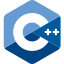
<br>

<div style="text-align:center; font-size:200%;">
 <b>Const und Constexpr</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 08 Const und Constexpr.ipynb -->
<!-- slides/module_120_basics/topic_174_const.cpp -->


# `const`

- Wir können das Schlüsselwort `const` verwenden, um Konstanten zu deklarieren.
- Konstanten können nicht verändert werden.
- Konstanten müssen initialisiert werden.

In [ ]:
const int answer{42};

In [ ]:
answer

In [ ]:
// answer = 43;

In [ ]:
// const int nope;


- Konstanten können zur Laufzeit initialisiert werden:

In [ ]:
#include <iostream>

int value{10};
// std::cin >> value;

In [ ]:
const int runtime_answer{value};

In [ ]:
runtime_answer


- Eine Anwendung von Konstanten ist das Benennen von
  Zwischenergebnissen:

In [ ]:
struct Point
{
    double x;
    double y;
};

In [ ]:
Point p1{1.0, 2.0};
Point p2{4.0, 6.0};

In [ ]:
double distance(Point p1, Point p2)
{
    const double dx{p2.x - p1.x};
    const double dy{p2.y - p1.y};
    return std::sqrt(dx * dx + dy * dy);
}

In [ ]:
distance(p1, p2)


- Unveränderliche Variablen sind ein wichtiges Werkzeug, um die Code-Qualität zu verbessern:
- [CG Con.1: By default, make objects
  immutable](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#con1-by-default-make-objects-immutable)
- [CG Con.4: Use const to define objects with values that do not change after
  construction](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#con4-use-const-to-define-objects-with-values-that-do-not-change-after-construction)
- [CG ES.25: Declare an object const or constexpr unless you want to modify
  its value later
  on](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#es25-declare-an-object-const-or-constexpr-unless-you-want-to-modify-its-value-later-on)


# `constexpr`-Variablen

- `constexpr`-Variablen müssen zur Compile-Zeit initialisiert werden.
- Der Initialisierungs-Wert muss vom Compiler ausgewertet werden können.
- `constexpr`-Variablen sind implizit `const`.

In [ ]:
constexpr int compiletime_answer{42};

In [ ]:
compiletime_answer

In [ ]:
// constexpr int compiletime_answer{value};

In [ ]:
constexpr int computed_answer{6 * 7};

In [ ]:
computed_answer


- [CG Con.5: Use constexpr for values that can be computed at compile
  time](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#con5-use-constexpr-for-values-that-can-be-computed-at-compile-time)


# `constinit`-Variablen (C++20)

- `constinit`-Variablen werden zur Compile-Zeit initialisiert.
- Sie können zur Laufzeit geändert werden.
- Sie können nicht in einem Header deklariert werden.

```cpp
constinit int answer{42};
answer += 1;
```


# `constexpr`-Funktionen

- `constexpr`-Funktionen sind Funktionen, die zur Compile-Zeit ausgewertet
  werden können.
- Sie müssen "reine Funktionen" sein (ohne Seiteneffekte).
- Sie können auch zur Laufzeit ausgewertet werden.

In [ ]:
constexpr int prod(int a, int b)
{
    int result{1};
    for (int i{a}; i <= b; ++i) {
        result *= i;
    }
    return result;
}

In [ ]:
constexpr int prod_1_to_10{prod(1, 10)};

In [ ]:
prod_1_to_10

In [ ]:
#include <iostream>

In [ ]:
void print_prod(int a, int b)
{
    std::cout << "prod(" << a << ", " << b << ") = " << prod(a, b) << "\n";
}

In [ ]:
print_prod(1, 10)


- [CG F.4: If a function might have to be evaluated at compile time, declare
  it
  constexpr](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#f4-if-a-function-might-have-to-be-evaluated-at-compile-time-declare-it-constexpr)


# `consteval`-Funktionen (C++20)

- Wenn wir sicherstellen wollen, dass eine Funktion zur Compile-Zeit
  ausgewertet wird, können wir das Schlüsselwort `consteval` verwenden:

```cpp
consteval int sum(int a, int b)
{
    int result{0};
    for (int i{a}; i <= b; ++i) {
        result += i;
    }
    return result;
}
```

```cpp
constexpr int sum_1_to_10{sum(1, 10)};

// ERROR: Cannot use sum() at runtime
void print_sum(int a, int b)
{
    std::cout << "sum(" << a << ", " << b << ") = " << sum(a, b) << "\n";
}
```


- Durch `consteval`- und `constexpr`-Funktionen ermöglichen viele Formen der
  Metaprogrammierung zur Compile-Zeit.
- Damit lassen sich manche Aufgabenstellungen, für die man in älteren
  C++-Versionen Template-Metaprogrammierung verwenden musste einfacher lösen.
- [CG Per.11: Move computation from run time to compile
  time](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#per11-move-computation-from-run-time-to-compile-time)
- [CG T.123: Use constexpr functions to compute values at compile
  time](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#t123-use-constexpr-functions-to-compute-values-at-compile-time)


## Mini-Workshop: Fakultät zur Compile-Zeit

Die Fakultät einer Zahl `n` ist das Produkt aller natürlichen Zahlen von `1`
bis `n`: `fact(n) = 1 * 2 * ... * n`.

- Schreiben Sie eine `constexpr`-Funktion `fact`, die die Fakultät einer Zahl
  berechnet.
- Berechnen Sie die Fakultät von 10. Wie stellen Sie sicher, dass die
  Berechnung zur Compile-Zeit erfolgt?

In [ ]:
constexpr long fact(int n)
{
    long result{1L};
    for (int i{2}; i <= n; ++i) {
        result *= i;
    }
    return result;
}

In [ ]:
constexpr long fact_10{fact(10)};

In [ ]:
fact_10